In [1]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from time import time

from tensorflow.keras.models import load_model, Sequential, Model
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Input, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger

from sklearn import random_projection, datasets
from sklearn.manifold import TSNE, MDS, LocallyLinearEmbedding, Isomap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [5]:
x_train=x_train.reshape(50000, 32*32*3)

In [6]:
x_train=pd.DataFrame(x_train)

In [7]:
display(x_train.head())

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,59,62,63,43,46,45,50,48,43,68,...,104,216,184,140,151,118,84,123,92,72
1,154,177,187,126,137,136,105,104,95,102,...,136,143,133,139,143,134,142,143,133,144
2,255,255,255,253,253,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,28,25,10,37,34,19,38,35,20,42,...,38,54,47,28,63,56,37,72,65,46
4,170,180,198,168,178,196,177,185,203,183,...,78,75,79,82,71,75,78,73,77,80


In [8]:
y_train=pd.DataFrame(y_train)

In [9]:
df_train=pd.concat([x_train,y_train],axis=1)

In [10]:
df_train=df_train.iloc[0:700,]

In [11]:
print(df_train.shape)

(700, 3073)


In [12]:
print(df_train.iloc[:,-1].value_counts())

0
1    83
9    79
6    74
4    72
7    72
0    72
8    69
2    63
3    61
5    55
Name: count, dtype: int64


In [13]:
sc = StandardScaler()
X = sc.fit_transform(df_train.iloc[:,:-1]) 
color=df_train.iloc[:,-1]

In [14]:
n_points = 1000
n_neighbors = 10
n_components = 2

PCA ...
MDS ...
Isomap ...
Isomap ...
LLE ...
t-SNE ...
LLE ...
t-SNE ...


Text(0.5, 1.0, 't-SNE: 1.89 sec')

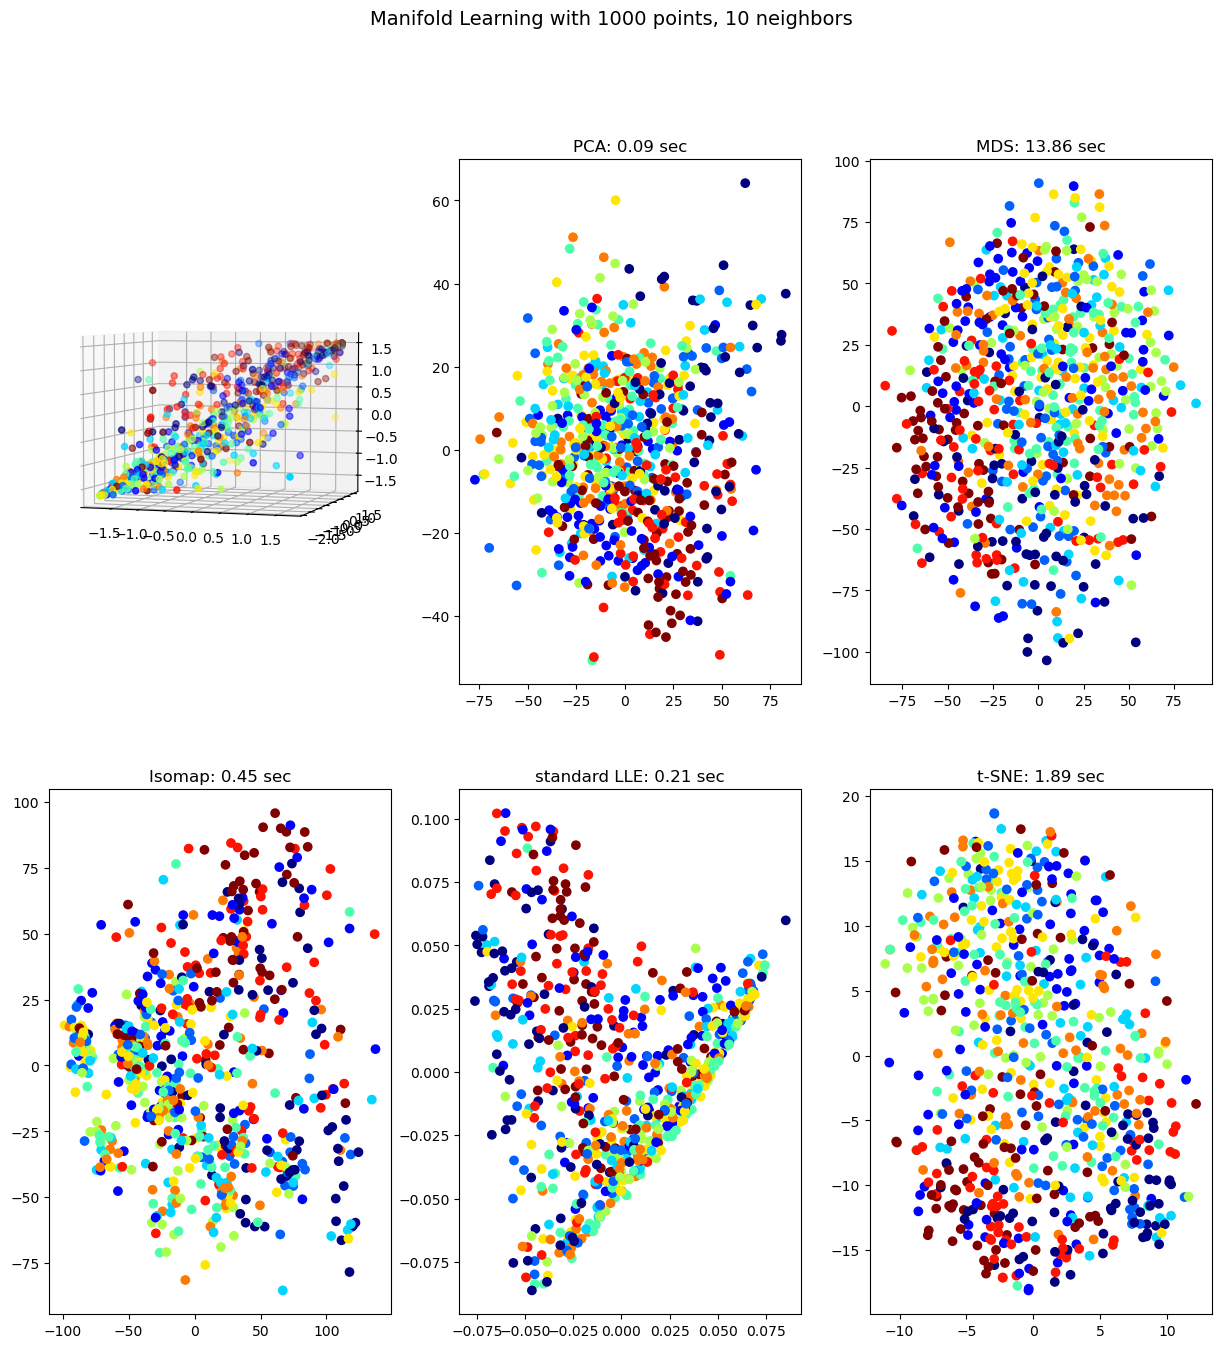

In [15]:
fig = plt.figure(figsize=(15, 15))
title = 'Manifold Learning'
title += ' with {} points,'.format(n_points)
title += ' {} neighbors'.format(n_neighbors)
plt.suptitle(title, fontsize=14)

ax = fig.add_subplot(2,3,1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.jet)
ax.view_init(4, -72)

print('PCA ...')
t0 = time()
n=X.shape[0]
Y = PCA(n_components=n_components).fit_transform(X*(np.sqrt(n-1))/(np.sqrt(n)))
t1 = time()
ax = fig.add_subplot(2,3,2)
plt.scatter(Y[:, 0], Y[:, 1],c=color, cmap=plt.cm.jet)
plt.title("PCA: {:.2f} sec".format(t1-t0))


print('MDS ...')
t0 = time()
Y = MDS(n_components=n_components, random_state=0).fit_transform(X)
t1 = time()
ax = fig.add_subplot(2,3,3)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.jet)
plt.title("MDS: {:.2f} sec".format(t1-t0))

print('Isomap ...')
t0 = time()
Y = Isomap(n_neighbors=n_neighbors, n_components=n_components).fit_transform(X)
t1 = time()
ax = fig.add_subplot(2,3,4)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.jet)
plt.title("Isomap: {:.2f} sec".format(t1-t0))

print('LLE ...')
t0 = time()
Y = LocallyLinearEmbedding(n_neighbors=n_neighbors,
                           n_components=n_components,
                           eigen_solver='auto',
                           method='standard',
                           random_state=0).fit_transform(X)
t1 = time()
ax = fig.add_subplot(2,3,5)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.jet)
plt.title("standard LLE: {:.2f} sec".format(t1-t0))

print('t-SNE ...')
t0 = time()
Y = TSNE(n_components=n_components,
         perplexity=30, n_iter=1000,
         random_state=0).fit_transform(X)
t1 = time()
ax = fig.add_subplot(2,3,6)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.jet)
plt.title("t-SNE: {:.2f} sec".format(t1-t0))